In [162]:
import pandas as pd
MSFT = pd.read_csv('MSFT.csv')
MSFT.head()
AAPL = pd.read_csv('AAPL.csv')
AAPL.head()
TSLA = pd.read_csv('TSLA.csv')
TSLA.head()
GOOGL = pd.read_csv('GOOGL.csv')
GOOGL.head()
AMZN = pd.read_csv('AMZN.csv')
AMZN.head()
SP = pd.read_csv('^GSPC.csv')
SP.head()
Dow = pd.read_csv('^DJI.csv')
stock_list = []
stock_list.append(AAPL)
stock_list.append(AMZN)
stock_list.append(GOOGL)
stock_list.append(MSFT)
stock_list.append(TSLA)
new_list = []
for stock in stock_list:
    previous = stock[["Adj Close"]]
    stock = stock[["Date", "Adj Close"]]
    
    temp = SP["Adj Close"]
    temp1 = Dow["Adj Close"]
    second = previous.iloc[:-1]
    secondsp = temp.iloc[:-1]
    seconddow = temp1.iloc[:-1]
    nonesp = pd.DataFrame([[None]], columns = ['S&P'])
    nonesdow = pd.DataFrame([[None]], columns = ['DOW'])
    nones = pd.DataFrame([[None]], columns = ['Adj Close'])
    
    second = second.rename(columns= {'Adj Close' : 'Previous Day'})
    secondsp = secondsp.rename(columns = {'S&P' : 'S&P Previous Day'})
    seconddow = seconddow.rename(columns = {'DOW' : 'DOW Previous Day'})
    secondsp = pd.concat([nonesp, secondsp]).reset_index(drop = True)
    seconddow = pd.concat([nonesdow, seconddow]).reset_index(drop = True)
    secondsp = secondsp[0]
    seconddow = seconddow[0]
    spprev = pd.DataFrame(columns = ['SP Percent Change'])
    for d, i in enumerate(temp):
        
        if d == 0:
            sptemp = pd.DataFrame([[None]], columns = ['SP Percent Change'])
            
            
        else:
            
            diff = ((i - secondsp[d])/secondsp[d]) * 100
           
            sptemp = pd.DataFrame([[diff]], columns = ['SP Percent Change'])
       
        spprev = pd.concat([spprev, sptemp]).reset_index(drop = True)
    dowprev = pd.DataFrame(columns = ['DOW Percent Change'])
    for d, i in enumerate(temp1):
        
        if d == 0:
            dowtemp = pd.DataFrame([[None]], columns = ['DOW Percent Change'])
            
            
        else:
            
            diff = ((i - seconddow[d])/seconddow[d]) * 100
           
            dowtemp = pd.DataFrame([[diff]], columns = ['DOW Percent Change'])
       
        dowprev = pd.concat([dowprev, dowtemp]).reset_index(drop = True)

   

    second = pd.concat([nones, second]).reset_index(drop = True)
    second = second["Previous Day"]
  
    temp.rename(columns = {'Adj Close' : 'S&P'})
    temp1.rename(columns = {'Adj Close' : 'DOW'})
    
    stock = stock.join(temp, lsuffix='Date', rsuffix='S&P')
    stock = stock.join(temp1, lsuffix= 'Date', rsuffix = 'DOW')
    stock = stock.join(second, lsuffix = 'Date', rsuffix = 'Adj Close')
    final = pd.DataFrame(columns = ['Percent Change'])
    for c, x in enumerate(stock['Adj CloseDate']):
        if c == 0:
            temp2 = pd.DataFrame([[None]], columns = ['Percent Change'])
        else: 
            diff = ((x - stock['Previous Day'][c] )/stock['Previous Day'][c]) * 100
            temp2 = pd.DataFrame([[diff]], columns = ['Percent Change'])
        final = pd.concat([final, temp2]).reset_index(drop = True)
    
    stock = stock.join(final, lsuffix = 'Date', rsuffix = 'Percent Change')
    stock = stock.join(spprev)
    stock = stock.join(dowprev)
    new_list.append(stock)
    #Previous days of stock market


for d,i in enumerate(new_list):
    new_list[d] = i.rename(columns = {'Adj CloseDate' : 'Adj Close', 'Adj CloseS&P' : 'S&P', 'Adj Close' : 'DOW'})
   
        
new_list[0]

#New list is a list of dataframes

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Date,Adj Close,S&P,DOW,Previous Day,Percent Change,SP Percent Change,DOW Percent Change
0,2015-01-02,100.216454,2058.199951,17832.990234,NaN,NaN,NaN,NaN
1,2015-01-05,97.393181,2020.579956,17501.650391,100.216454,-2.817175,-1.827811,-1.858016
2,2015-01-06,97.402374,2002.609985,17371.640625,97.393181,0.009439,-0.889347,-0.742843
3,2015-01-07,98.768150,2025.900024,17584.519531,97.402374,1.402200,1.162984,1.225439
4,2015-01-08,102.563072,2062.139893,17907.869141,98.768150,3.842253,1.788828,1.838831
...,...,...,...,...,...,...,...,...
499,2016-12-23,111.043777,2263.790039,19933.810547,110.824593,0.197776,0.125172,0.074952
500,2016-12-27,111.749001,2268.879883,19945.039063,111.043777,0.635086,0.224837,0.056329
501,2016-12-28,111.272507,2249.919922,19833.679688,111.749001,-0.426397,-0.835653,-0.558331
502,2016-12-29,111.243919,2249.260010,19819.779297,111.272507,-0.025692,-0.029330,-0.070085


In [164]:

import json
import pandas as pd
months = dict()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_dates = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
for d,i in enumerate(month_names):
    months[i] = month_dates[d]

with open('historicSentimentData.json', 'r+') as f:
    sentiments =''
    for line in f:
        sentiments = json.loads(line) #just one line
    for i in sentiments.copy().keys():
        temp = i.split(" ")
        datestr = ''
        datestr += temp[3]
        datestr += '-'
        datestr += months[temp[1]]
        datestr += '-'
        datestr += temp[2]
      
        sentiments[datestr] = sentiments[i]
        del sentiments[i]
stock_dict = dict()
stocks = ['AAPL', 'AMZN', 'GOOGL', 'MSFT', 'TSLA']
for d,i in enumerate(new_list):
    stock_dict[stocks[d]] = i
#stock_dict is now dictionary of (Stock name : dataframe)
date_list = [] #store dates

for i in new_list:
    for x in i['Date']:
      
        date_list.append([x])
    break
for d,i in enumerate(date_list):
    for key, value in sentiments.items():
        if key == i[0]:
            date_list[d].append(value)

for d,i in enumerate(date_list):
    if len(i) == 1:
        date_list[d].append(0)

for key, values in stock_dict.items():
    temp_data = []
    for i in date_list:
        if i[1] == 0:
            temp_data.append(0)
        else:
            temp_data.append(i[1][key])
    values['Sentiments'] = temp_data
print(len(stock_dict['GOOGL']))


504
           Date   Adj Close          S&P           DOW  Previous Day  \
0    2015-01-02  529.549988  2058.199951  17832.990234           NaN   
1    2015-01-05  519.460022  2020.579956  17501.650391    529.549988   
2    2015-01-06  506.640015  2002.609985  17371.640625    519.460022   
3    2015-01-07  505.149994  2025.900024  17584.519531    506.640015   
4    2015-01-08  506.910004  2062.139893  17907.869141    505.149994   
..          ...         ...          ...           ...           ...   
499  2016-12-23  807.799988  2263.790039  19933.810547    809.679993   
500  2016-12-27  809.929993  2268.879883  19945.039063    807.799988   
501  2016-12-28  804.570007  2249.919922  19833.679688    809.929993   
502  2016-12-29  802.880005  2249.260010  19819.779297    804.570007   
503  2016-12-30  792.450012  2238.830078  19762.599609    802.880005   

     Percent Change  SP Percent Change  DOW Percent Change  Sentiments  
0               NaN                NaN                 NaN

In [165]:
import pandas as pd
MSFT1 = pd.read_csv('MSFT2.csv')
MSFT1.head()

AAPL1 = pd.read_csv('AAPL2.csv')
AAPL1.head()

TSLA1 = pd.read_csv('TSLA2.csv')
TSLA1.head()
GOOGL1 = pd.read_csv('GOOGL2.csv')
GOOGL1.head()
AMZN1 = pd.read_csv('AMZN2.csv')
AMZN1.head()
SP1 = pd.read_csv('^GSPC2.csv')
SP1.head()
Dow1 = pd.read_csv('^DJI2.csv')
stock_list1 = []
stock_list1.append(AAPL1)
stock_list1.append(AMZN1)
stock_list1.append(GOOGL1)
stock_list1.append(MSFT1)
stock_list1.append(TSLA1)
new_list1 = []
for stock1 in stock_list1:
    previous1 = stock1[["Adj Close"]]
    stock1 = stock1[["Date", "Adj Close"]]
    
    temp1 = SP1["Adj Close"]
    temp2 = Dow1["Adj Close"]
    second1 = previous1.iloc[:-1]
    secondsp1 = temp1.iloc[:-1]
    seconddow1 = temp2.iloc[:-1]
    nonesp1 = pd.DataFrame([[None]], columns = ['S&P'])
    nonesdow1 = pd.DataFrame([[None]], columns = ['DOW'])
    nones1 = pd.DataFrame([[None]], columns = ['Adj Close'])
    
    second1 = second1.rename(columns= {'Adj Close' : 'Previous Day'})
    secondsp1 = secondsp1.rename(columns = {'S&P' : 'S&P Previous Day'})
    seconddow1 = seconddow1.rename(columns = {'DOW' : 'DOW Previous Day'})
    secondsp1 = pd.concat([nonesp1, secondsp1]).reset_index(drop = True)
    seconddow1 = pd.concat([nonesdow1, seconddow1]).reset_index(drop = True)
    secondsp1 = secondsp1[0]
    seconddow1 = seconddow1[0]
    spprev1 = pd.DataFrame(columns = ['SP Percent Change'])
    for d, i in enumerate(temp1):
        
        if d == 0:
            sptemp1 = pd.DataFrame([[None]], columns = ['SP Percent Change'])
            
            
        else:
            
            diff = ((i - secondsp1[d])/secondsp1[d]) * 100
           
            sptemp1 = pd.DataFrame([[diff]], columns = ['SP Percent Change'])
       
        spprev1 = pd.concat([spprev1, sptemp1]).reset_index(drop = True)
    dowprev1 = pd.DataFrame(columns = ['DOW Percent Change'])
    for d, i in enumerate(temp2):
        
        if d == 0:
            dowtemp1 = pd.DataFrame([[None]], columns = ['DOW Percent Change'])
            
            
        else:
            
            diff = ((i - seconddow1[d])/seconddow1[d]) * 100
           
            dowtemp1 = pd.DataFrame([[diff]], columns = ['DOW Percent Change'])
       
        dowprev1 = pd.concat([dowprev1, dowtemp1]).reset_index(drop = True)

    second1 = pd.concat([nones1, second1]).reset_index(drop = True)
    second1 = second1["Previous Day"]
  
    temp1.rename(columns = {'Adj Close' : 'S&P'})
    temp2.rename(columns = {'Adj Close' : 'DOW'})
   
    stock1 = stock1.join(temp1, lsuffix='Date', rsuffix='S&P')
    stock1 = stock1.join(temp2, lsuffix= 'Date', rsuffix = 'DOW')
    stock1 = stock1.join(second1, lsuffix = 'Date', rsuffix = 'Adj Close')
    final1 = pd.DataFrame(columns = ['Percent Change'])
    for c, x in enumerate(stock1['Adj CloseDate']):
        if c == 0:
            temp3 = pd.DataFrame([[None]], columns = ['Percent Change'])
        else: 
            diff1 = ((x - stock1['Previous Day'][c])/stock1['Previous Day'][c]) * 100
            temp3 = pd.DataFrame([[diff1]], columns = ['Percent Change'])
        final1 = pd.concat([final1, temp3]).reset_index(drop = True)
   
    stock1 = stock1.join(final1, lsuffix = 'Date', rsuffix = 'Percent Change')
    stock1 = stock1.join(spprev1)
    stock1 = stock1.join(dowprev1)
    new_list1.append(stock1)
    #Previous days of stock market


for d,i in enumerate(new_list1):
    new_list1[d] = i.rename(columns = {'Adj CloseDate' : 'Adj Close', 'Adj CloseS&P' : 'S&P', 'Adj Close' : 'DOW'})
   
        
new_list1[0]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Date,Adj Close,S&P,DOW,Previous Day,Percent Change,SP Percent Change,DOW Percent Change
0,2020-03-20,229.240005,2304.919922,19173.980469,NaN,NaN,NaN,NaN
1,2020-03-23,224.369995,2237.399902,18591.929688,229.240005,-2.124415,-2.929387,-3.035628
2,2020-03-24,246.880005,2447.330078,20704.910156,224.369995,10.032540,9.382774,11.365041
3,2020-03-25,245.520004,2475.560059,21200.550781,246.880005,-0.550875,1.153501,2.393831
4,2020-03-26,258.440002,2630.070068,22552.169922,245.520004,5.262300,6.241416,6.375396
5,2020-03-27,247.740005,2541.469971,21636.779297,258.440002,-4.140225,-3.368735,-4.058991
6,2020-03-30,254.809998,2626.649902,22327.480469,247.740005,2.853795,3.351601,3.192255
7,2020-03-31,254.289993,2584.590088,21917.160156,254.809998,-0.204076,-1.601272,-1.837737
8,2020-04-01,240.910004,2470.500000,20943.509766,254.289993,-5.261705,-4.414243,-4.442411
9,2020-04-02,244.929993,2526.899902,21413.439453,240.910004,1.668668,2.282935,2.243796


In [169]:

import json
import pandas as pd
months = dict()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_dates = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
for d,i in enumerate(month_names):
    months[i] = month_dates[d]

with open('sentimentData.json', 'r+') as f:
    sentiments1 =''
    for line in f:
        sentiments1 = json.loads(line) #just one line
    
stock_dict1 = dict()
stocks = ['AAPL', 'AMZN', 'GOOGL', 'MSFT', 'TSLA']
for d,i in enumerate(new_list1):
    stock_dict1[stocks[d]] = i
#stock_dict is now dictionary of (Stock name : dataframe)
date_list1 = [] #store dates

for i in new_list1:
    for x in i['Date']:
      
        date_list1.append([x])
    break
for d,i in enumerate(date_list1):
    for key, value in sentiments1.items():
        if key == i[0]:
            date_list1[d].append(value)

for d,i in enumerate(date_list1):
    if len(i) == 1:
        date_list1[d].append(0)

for key, values in stock_dict1.items():
    temp_data1 = []
    for i in date_list1:
        if i[1] == 0:
            temp_data1.append(0)
        else:
            temp_data1.append(i[1][key])
    values['Sentiments'] = temp_data1
print(len(stock_dict1['MSFT']))

15


In [170]:
finalApple = pd.concat([stock_dict['AAPL'], stock_dict1['AAPL']])
finalApple.reset_index()
finalMicrosoft = pd.concat([stock_dict['MSFT'], stock_dict1['MSFT']])
finalMicrosoft.reset_index()
finalGoogle = pd.concat([stock_dict['GOOGL'], stock_dict1['GOOGL']])
finalGoogle.reset_index()
finalAmazon = pd.concat([stock_dict['AMZN'], stock_dict1['AMZN']])
finalAmazon.reset_index()
finalTesla = pd.concat([stock_dict['TSLA'], stock_dict1['TSLA']])
finalTesla.reset_index()

finalApple

,Date,Adj Close,S&P,DOW,Previous Day,Percent Change,SP Percent Change,DOW Percent Change,Sentiments
0,2015-01-02,100.216454,2058.199951,17832.990234,NaN,NaN,NaN,NaN,0.000000
1,2015-01-05,97.393181,2020.579956,17501.650391,100.216454,-2.817175,-1.827811,-1.858016,0.000000
2,2015-01-06,97.402374,2002.609985,17371.640625,97.393181,0.009439,-0.889347,-0.742843,0.000000
3,2015-01-07,98.768150,2025.900024,17584.519531,97.402374,1.402200,1.162984,1.225439,0.000000
4,2015-01-08,102.563072,2062.139893,17907.869141,98.768150,3.842253,1.788828,1.838831,0.000000
...,...,...,...,...,...,...,...,...,...
10,2020-04-03,241.410004,2488.649902,21052.529297,244.929993,-1.437141,-1.513713,-1.685438,0.040000
11,2020-04-06,262.470001,2663.679932,22679.990234,241.410004,8.723747,7.033132,7.730477,0.080000
12,2020-04-07,259.429993,2659.409912,22653.859375,262.470001,-1.158231,-0.160305,-0.115215,0.280000
13,2020-04-08,266.070007,2749.979980,23433.570313,259.429993,2.559463,3.405645,3.441846,0.230000


Root mean squared error = 0.9162
R-squared = 0.7348


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


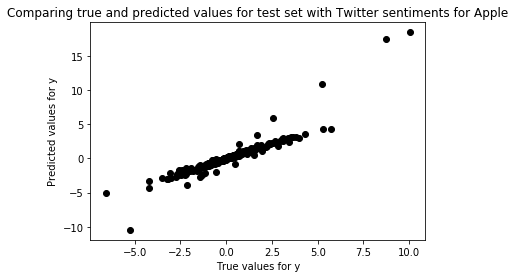

In [171]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
ay = finalApple['Percent Change'] 

dates = finalApple['Date']
finalApple = finalApple.drop(columns= ['Percent Change', 'Date'])
finalApple['Previous Day'][0] = finalApple['Adj Close'][0]
finalApple['SP Percent Change'][0] = 0
finalApple['DOW Percent Change'][0] = 0
ay[0] = 0
X_train, X_test, y_train, y_test = train_test_split(finalApple, ay, test_size = 0.6, random_state = 3)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred_test = regr.predict(X_test)
# Comparing true versus predicted values
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set with Twitter sentiments for Apple')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

Root mean squared error = 1.0732
R-squared = 0.6919


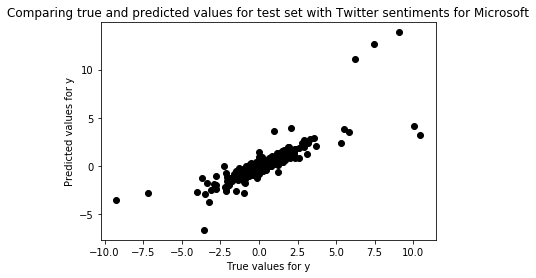

In [172]:
my = finalMicrosoft['Percent Change'] 

dates = finalMicrosoft['Date']
finalMicrosoft = finalMicrosoft.drop(columns= ['Percent Change', 'Date'])
finalMicrosoft['Previous Day'][0] = finalMicrosoft['Adj Close'][0]
finalMicrosoft['SP Percent Change'][0] = 0
finalMicrosoft['DOW Percent Change'][0] = 0
my[0] = 0
X_train, X_test, y_train, y_test = train_test_split(finalMicrosoft, my, test_size = 0.6, random_state = 3)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred_test = regr.predict(X_test)
# Comparing true versus predicted values
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set with Twitter sentiments for Microsoft')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

Root mean squared error = 0.4483
R-squared = 0.9232


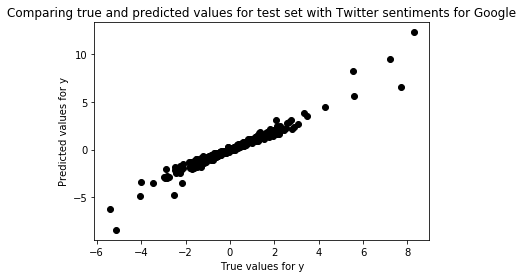

In [173]:
gy = finalGoogle['Percent Change'] 

dates = finalGoogle['Date']
finalGoogle = finalGoogle.drop(columns= ['Percent Change', 'Date'])
finalGoogle['Previous Day'][0] = finalGoogle['Adj Close'][0]
finalGoogle['SP Percent Change'][0] = 0
finalGoogle['DOW Percent Change'][0] = 0
gy[0] = 0
X_train, X_test, y_train, y_test = train_test_split(finalGoogle, gy, test_size = 0.6, random_state = 3)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred_test = regr.predict(X_test)
# Comparing true versus predicted values
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set with Twitter sentiments for Google')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

Root mean squared error = 0.9594
R-squared = 0.7908


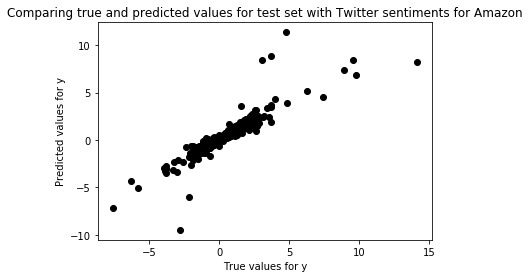

In [174]:
amy = finalAmazon['Percent Change'] 

dates = finalAmazon['Date']
finalAmazon = finalAmazon.drop(columns= ['Percent Change', 'Date'])
finalAmazon['Previous Day'][0] = finalAmazon['Adj Close'][0]
finalAmazon['SP Percent Change'][0] = 0
finalAmazon['DOW Percent Change'][0] = 0
amy[0] = 0
X_train, X_test, y_train, y_test = train_test_split(finalAmazon, amy, test_size = 0.6, random_state = 3)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred_test = regr.predict(X_test)
# Comparing true versus predicted values
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set with Twitter sentiments for Amazon')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

Root mean squared error = 1.4284
R-squared = 0.7212


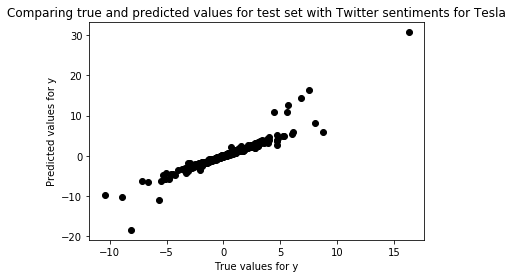

In [175]:
ty = finalTesla['Percent Change'] 

dates = finalTesla['Date']
finalTesla = finalTesla.drop(columns= ['Percent Change', 'Date'])
finalTesla['Previous Day'][0] = finalTesla['Adj Close'][0]
finalTesla['SP Percent Change'][0] = 0
finalTesla['DOW Percent Change'][0] = 0
ty[0] = 0
X_train, X_test, y_train, y_test = train_test_split(finalTesla, ty, test_size = 0.6, random_state = 3)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred_test = regr.predict(X_test)
# Comparing true versus predicted values
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set with Twitter sentiments for Tesla')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

Root mean squared error = 0.8827
R-squared = 0.7538


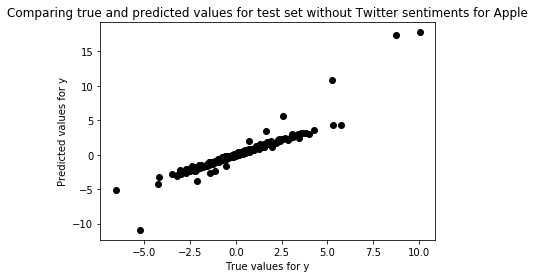

In [176]:

finalApple = finalApple.drop(columns = ['Sentiments'])
X_train, X_test, y_train, y_test = train_test_split(finalApple, ay, test_size = 0.6, random_state = 3)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred_test = regr.predict(X_test)
# Comparing true versus predicted values
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set without Twitter sentiments for Apple')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')
# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

Root mean squared error = 1.0702
R-squared = 0.6936


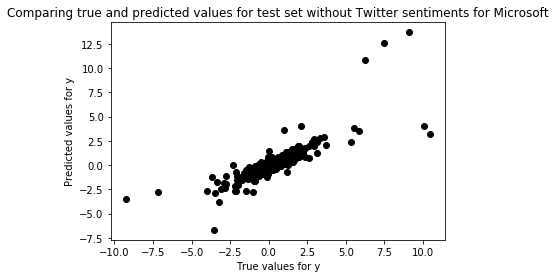

In [177]:
finalMicrosoft = finalMicrosoft.drop(columns = ['Sentiments'])
X_train, X_test, y_train, y_test = train_test_split(finalMicrosoft, my, test_size = 0.6, random_state = 3)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred_test = regr.predict(X_test)
# Comparing true versus predicted values
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set without Twitter sentiments for Microsoft')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')
# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

Root mean squared error = 0.4454
R-squared = 0.9242


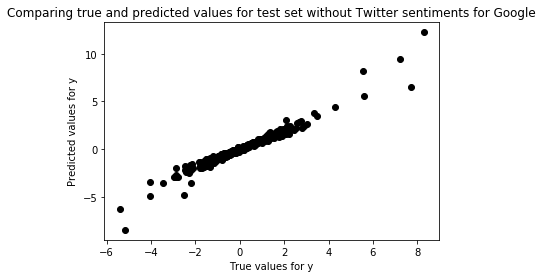

In [178]:
finalGoogle = finalGoogle.drop(columns = ['Sentiments'])
X_train, X_test, y_train, y_test = train_test_split(finalGoogle, gy, test_size = 0.6, random_state = 3)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred_test = regr.predict(X_test)
# Comparing true versus predicted values
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set without Twitter sentiments for Google')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')
# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

Root mean squared error = 0.9559
R-squared = 0.7924


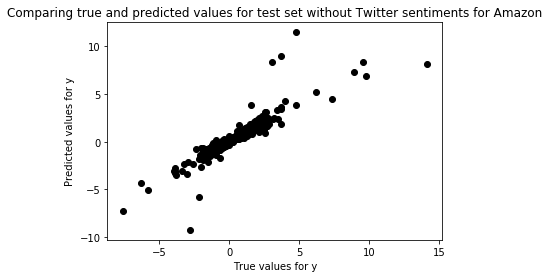

In [179]:
finalAmazon = finalAmazon.drop(columns = ['Sentiments'])
X_train, X_test, y_train, y_test = train_test_split(finalAmazon, amy, test_size = 0.6, random_state = 3)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred_test = regr.predict(X_test)
# Comparing true versus predicted values
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set without Twitter sentiments for Amazon')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')
# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

Root mean squared error = 1.4260
R-squared = 0.7221


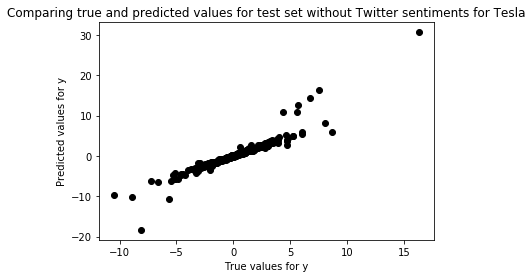

In [180]:
finalTesla = finalTesla.drop(columns = ['Sentiments'])
X_train, X_test, y_train, y_test = train_test_split(finalTesla, ty, test_size = 0.6, random_state = 3)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred_test = regr.predict(X_test)
# Comparing true versus predicted values
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set without Twitter sentiments for Tesla')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')
# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))